In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

from utilities import data_basic_utility as databasic
from utilities import dataframe_utility as dfutil
import features_utility as featutil

## File Details - SKLearn Linear Regression 1

This is a Candidate for being used in the basic Ensemble, probably as a stand in 
Characteristics:
* SKLearn basic Linear Regression
* Using all columns
* Includes calculated Review Count columns by Reviewer and by Beer
* Todo: use optimised parameters for Light GBM Regression


In [2]:
filePrefix = "A3_080_sk_linreg1"
baseDataDir = "C:/Development/Data/COSC2670/Assignment3/A3data/"
subrunDir = "subruns/"
writeSubRunFile = True
seed = databasic.get_random_seed()

In [3]:
# RowID  BeerID  ReviewerID  BeerName  BeerType  Label
# df_train = pd.read_csv(baseDataDir + 'train_500k.tsv',sep='\t',
df_train = pd.read_csv(baseDataDir + 'train_200k.tsv',sep='\t',
                         names=['RowID','BeerID','ReviewerID',
                                  'BeerName','BeerType','rating'])
df_train.head(10)

# df_vali = pd.read_csv(baseDataDir + 'vali_500k.tsv',sep='\t',
df_vali = pd.read_csv(baseDataDir + 'vali_200k.tsv',sep='\t',
                         names=['RowID','BeerID','ReviewerID',
                                  'BeerName','BeerType','rating'])
df_vali.head(10)


,RowID,BeerID,ReviewerID,BeerName,BeerType,rating
0,22,12300,2634,Rauch �r Bock,Rauchbier,4.0
1,27,12300,5634,Rauch �r Bock,Rauchbier,4.5
2,28,12300,3544,Rauch �r Bock,Rauchbier,4.5
3,40,12300,6521,Rauch �r Bock,Rauchbier,4.0
4,43,12300,10177,Rauch �r Bock,Rauchbier,4.5
5,48,12300,2907,Rauch �r Bock,Rauchbier,3.5
6,49,12300,1532,Rauch �r Bock,Rauchbier,4.0
7,50,12300,3452,Rauch �r Bock,Rauchbier,3.5
8,59,12300,6861,Rauch �r Bock,Rauchbier,4.0
9,64,6699,6401,Caldera Pale Ale,American Pale Ale (APA),4.5


Add the Review Count columns for Reviewers and Beers to both the Train and Validation sets

In [4]:
df_train = featutil.addReviewerReviewCount(df_train)
df_train = featutil.addBeerReviewCount(df_train)

df_vali = featutil.addReviewerReviewCount(df_vali)
df_vali = featutil.addBeerReviewCount(df_vali)


In [5]:
print(df_train.shape)
df_train.sort_values("ReviewerID").head(10)


(120564, 8)


,RowID,BeerID,ReviewerID,BeerName,BeerType,rating,ReviewerReviewCount,BeerReviewCount
46308,203256,1206,1,1554 Enlightened Black Ale,Belgian Dark Ale,5.0,33,666
75080,165234,3686,1,Racer X,American Double / Imperial IPA,4.5,33,189
35128,189099,8296,1,Green Flash Hop Head Red Ale,American Amber / Red Ale,3.0,33,399
103155,176056,9294,1,Belgian White,Witbier,2.5,33,87
21009,223691,4575,1,Yeti Imperial Stout,Russian Imperial Stout,4.5,33,831
85638,200363,6897,1,2� Below Winter Ale,Extra Special / Strong Bitter (ESB),2.5,33,317
120225,111445,6162,1,Coopers Mild Ale,English Pale Mild Ale,3.0,33,14
119449,111809,5108,1,Heritage Premium Ale,English Pale Ale,3.5,33,7
51190,79153,1623,1,Sierra Nevada Bigfoot Barleywine Style Ale,American Barleywine,3.0,33,1434
91327,131521,4607,1,SPF 45 Saison,Saison / Farmhouse Ale,5.0,33,26


In [6]:
# RowID BrewerID ABV DayofWeek Month DayofMonth Year TimeOfDay Gender Birthday Text Lemmatized POS_Tag
# df_features = pd.read_csv(baseDataDir + 'features_500k.tsv',sep='\t', names=['RowID','BrewerID','ABV','DayofWeek','Month',
df_features = pd.read_csv(baseDataDir + 'features_200k.tsv',sep='\t', names=['RowID','BrewerID','ABV','DayofWeek','Month',
                                                                 'DayofMonth','Year','TimeOfDay','Gender',
                                                                 'Birthday','Text','Lemmatized','POS_Tag'])

df_features.head()

,RowID,BrewerID,ABV,DayofWeek,Month,DayofMonth,Year,TimeOfDay,Gender,Birthday,Text,Lemmatized,POS_Tag
0,18,1075,7.4,Mon,Jan,2,2012,15:20:04,Male,unknown,Pours a murky light brown with a 1 inch fizzy ...,pour a murky light brown with a 1 inch fizzy t...,VBZ DT JJ NN JJ IN DT CD NN JJ NN NN WDT VBZ I...
1,19,1075,7.4,Sun,Jan,1,2012,06:46:52,Male,unknown,Faint sudsy head with some with some dissipati...,faint sudsy head with some with some dissipate...,NN JJ NN IN DT IN DT VBG JJ NN . JJ JJ NN . DT...
2,20,1075,7.4,Tue,Nov,29,2011,05:51:44,Male,unknown,A new arrival to the West TN area ... Pours qu...,a new arrival to the West TN area ... pour qui...,"DT JJ NN IN DT NNP NNP NN , VBZ PDT DT NN JJR ..."
3,21,1075,7.4,Sat,Nov,5,2011,22:59:57,Male,unknown,Sampled 10/30/11 - Transferring the notes . A ...,sample 10/30/11 - transfer the note . a ruby p...,VBN CD HYPH VBG DT NNS . DT NN VBP IN DT NN NN...
4,22,1075,7.4,Tue,Nov,1,2011,20:40:21,Male,"Oct 14, 1983",This is my first rauchbier . Pours a burnt amb...,this be my first rauchbier . pour a burn amber...,DT VBZ PRP$ JJ NN . VBZ DT VBN NN . JJ NN . NN...


In [7]:
print(df_features.isnull().sum())

RowID            0
BrewerID         0
ABV           3277
DayofWeek        0
Month            0
DayofMonth       0
Year             0
TimeOfDay        0
Gender           0
Birthday         0
Text            41
Lemmatized      41
POS_Tag         41
dtype: int64


In [8]:
colsToUse = ["RowID", "BrewerID", "ABV", "DayofWeek", "DayofMonth", "Month", "Year", "Gender", "TimeOfDay"]

# Find the feature records that match the training and validation data and join them together
dfFullData = df_train.join(df_features[colsToUse], on="RowID", how="inner", rsuffix="Feat")
dfFullDataVali = df_vali.join(df_features[colsToUse], on="RowID", how="inner", rsuffix="Feat")

dfFullData.head()

,RowID,BeerID,ReviewerID,BeerName,BeerType,rating,ReviewerReviewCount,BeerReviewCount,RowIDFeat,BrewerID,ABV,DayofWeek,DayofMonth,Month,Year,Gender,TimeOfDay
0,19,12300,10635,Rauch �r Bock,Rauchbier,4.0,36,23,37,1075,7.4,Mon,23,May,2011,Male,15:36:28
1,21,12300,6547,Rauch �r Bock,Rauchbier,4.5,4,23,40,1075,7.4,Mon,16,May,2011,Male,00:31:46
2,23,12300,9789,Rauch �r Bock,Rauchbier,4.5,36,23,42,1075,7.4,Sun,10,Apr,2011,unknown,12:17:26
3,24,12300,7372,Rauch �r Bock,Rauchbier,5.0,69,23,43,1075,7.4,Wed,30,Mar,2011,Male,14:08:00
4,25,12300,1302,Rauch �r Bock,Rauchbier,4.5,59,23,45,1075,7.4,Thu,24,Mar,2011,Male,14:07:00


In [9]:
# Remove the duplicated Row ID, also remove Beer Name at this point, we're nt using it
df_train_data = dfFullData.drop(['RowIDFeat', "BeerName"],axis=1)
df_vali_data = dfFullDataVali.drop(['RowIDFeat', "BeerName"],axis=1)

df_train_data.head()

,RowID,BeerID,ReviewerID,BeerType,rating,ReviewerReviewCount,BeerReviewCount,BrewerID,ABV,DayofWeek,DayofMonth,Month,Year,Gender,TimeOfDay
0,19,12300,10635,Rauchbier,4.0,36,23,1075,7.4,Mon,23,May,2011,Male,15:36:28
1,21,12300,6547,Rauchbier,4.5,4,23,1075,7.4,Mon,16,May,2011,Male,00:31:46
2,23,12300,9789,Rauchbier,4.5,36,23,1075,7.4,Sun,10,Apr,2011,unknown,12:17:26
3,24,12300,7372,Rauchbier,5.0,69,23,1075,7.4,Wed,30,Mar,2011,Male,14:08:00
4,25,12300,1302,Rauchbier,4.5,59,23,1075,7.4,Thu,24,Mar,2011,Male,14:07:00


In [10]:
print(df_train_data.shape)
print(df_vali_data.shape)

(106546, 15)
(35089, 15)


In [11]:
colsToUse.append("BeerType")
colsToUse.append("ReviewerReviewCount")
colsToUse.append("BeerReviewCount")

considerCol = {}

# Initialize them all to True, use all the cols
for colName in colsToUse:
  considerCol[colName] = True

# "RowID", "BrewerID", "BeerType", "ABV", "DayofWeek", "DayofMonth", "Month", "Year", "Gender", "TimeOfDay"
# Disable any column we want

# Usually always use Year and REview Counts
# considerCol["Year"] = False
# considerCol["ReviewerReviewCount"] = False
# considerCol["BeerReviewCount"] = False

# Beer Context Columns
# considerCol["ABV"] = False
# considerCol["BrewerID"] = False
# considerCol["BeerType"] = False

# Consumer Context Columns
# considerCol["DayofWeek"] = False
# considerCol["DayofMonth"] = False
# considerCol["Month"] = False
# considerCol["TimeOfDay"] = False
# considerCol["Gender"] = False


In [12]:
if considerCol["ABV"] == False:
  del df_train_data["ABV"]
  del df_vali_data["ABV"]
else:
  df_train_data = featutil.fixNullABV(df_train_data)
  df_vali_data = featutil.fixNullABV(df_vali_data)  

In [13]:
if considerCol["BrewerID"] == False:
  del df_train_data["BrewerID"]
  del df_vali_data["BrewerID"]
else: 
  df_train_data, df_vali_data = dfutil.getDummiesForSplitSets(df_train_data, df_vali_data, "BrewerID")


c:\Development\COSC2670\Assignment3\utilities\dataframe_utility.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_combined.columns = df_combined.columns.str.replace(" ", "").str.replace("/", "").str.replace("-", "") \


In [14]:
if considerCol["BeerType"] == False:
  del df_train_data["BeerType"]
  del df_vali_data["BeerType"]
else: 
  df_train_data, df_vali_data = dfutil.getDummiesForSplitSets(df_train_data, df_vali_data, "BeerType")

In [15]:
if considerCol["Gender"] == False:
  del df_train_data["Gender"]
  del df_vali_data["Gender"]
else: 
  df_train_data, df_vali_data = dfutil.getDummiesForSplitSets(df_train_data, df_vali_data, "Gender")

In [16]:
if considerCol["DayofWeek"] == False:
  del df_train_data["DayofWeek"]
  del df_vali_data["DayofWeek"]
else: 
  df_train_data = featutil.formatDayOfWeek(df_train_data)
  df_vali_data = featutil.formatDayOfWeek(df_vali_data)

In [17]:
if considerCol["Month"] == False:
  del df_train_data["Month"]
  del df_vali_data["Month"]
else: 
  df_train_data = featutil.formatMonth(df_train_data)
  df_vali_data = featutil.formatMonth(df_vali_data)

In [18]:
if considerCol["DayofMonth"] == False:
  del df_train_data["DayofMonth"]
  del df_vali_data["DayofMonth"]

In [19]:
if considerCol["Year"] == False:
  del df_train_data["Year"]
  del df_vali_data["Year"]

In [20]:
if considerCol["TimeOfDay"] == False:
  del df_train_data["TimeOfDay"]
  del df_vali_data["TimeOfDay"]
else: 
  df_train_data = featutil.formatTimeToSec(df_train_data)
  df_vali_data = featutil.formatTimeToSec(df_vali_data)

In [21]:
if considerCol["ReviewerReviewCount"] == False:
  del df_train_data["ReviewerReviewCount"]
  del df_vali_data["ReviewerReviewCount"]

In [22]:
if considerCol["BeerReviewCount"] == False:
  del df_train_data["BeerReviewCount"]
  del df_vali_data["BeerReviewCount"]

In [23]:
print(df_train_data.shape)
print(df_vali_data.shape)

df_train_data.head()

(106546, 402)
(35089, 402)


,RowID,BeerID,ReviewerID,rating,ReviewerReviewCount,BeerReviewCount,ABV,DayofWeek,DayofMonth,Month,...,BeerType_SmokedBeer,BeerType_Tripel,BeerType_ViennaLager,BeerType_Weizenbock,BeerType_Wheatwine,BeerType_WinterWarmer,BeerType_Witbier,Gender_Female,Gender_Male,Gender_unknown
0,19,12300,10635,4.0,36,23,7.4,1,23,5,...,0,0,0,0,0,0,0,0,1,0
1,21,12300,6547,4.5,4,23,7.4,1,16,5,...,0,0,0,0,0,0,0,0,1,0
2,23,12300,9789,4.5,36,23,7.4,7,10,4,...,0,0,0,0,0,0,0,0,0,1
3,24,12300,7372,5.0,69,23,7.4,3,30,3,...,0,0,0,0,0,0,0,0,1,0
4,25,12300,1302,4.5,59,23,7.4,4,24,3,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df_vali_data.head()

,RowID,BeerID,ReviewerID,rating,ReviewerReviewCount,BeerReviewCount,ABV,DayofWeek,DayofMonth,Month,...,BeerType_SmokedBeer,BeerType_Tripel,BeerType_ViennaLager,BeerType_Weizenbock,BeerType_Wheatwine,BeerType_WinterWarmer,BeerType_Witbier,Gender_Female,Gender_Male,Gender_unknown
0,22,12300,2634,4.0,4,9,7.4,6,14,5,...,0,0,0,0,0,0,0,0,0,1
1,27,12300,5634,4.5,9,9,7.4,4,10,2,...,0,0,0,0,0,0,0,0,0,1
2,28,12300,3544,4.5,40,9,7.4,5,10,12,...,0,0,0,0,0,0,0,0,0,1
3,40,12300,6521,4.0,19,9,5.5,4,27,8,...,0,0,0,0,0,0,0,0,1,0
4,43,12300,10177,4.5,2,9,5.5,1,10,8,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# free up the memory
del dfFullData
del dfFullDataVali

In [26]:
# Get all the columns
col_names = df_train_data.columns

idCols = ['RowID','BeerID','ReviewerID']
feature_cols =  col_names.drop(['RowID','BeerID','ReviewerID','rating' ])
target_col = 'rating'

# Create the sub data sets of the features and the target
dfTrainIds = df_train_data[idCols]
dfTrainFeatures = df_train_data[feature_cols]
dfTrainTarget = df_train_data[target_col]

dfValiIds = df_vali_data[idCols]
dfValiFeatures = df_vali_data[feature_cols]
dfValiTarget = df_vali_data[target_col]


In [27]:
print(dfTrainFeatures.shape)
dfTrainFeatures.head()

(106546, 398)


,ReviewerReviewCount,BeerReviewCount,ABV,DayofWeek,DayofMonth,Month,Year,TimeOfDay,BrewerID_1,BrewerID_2,...,BeerType_SmokedBeer,BeerType_Tripel,BeerType_ViennaLager,BeerType_Weizenbock,BeerType_Wheatwine,BeerType_WinterWarmer,BeerType_Witbier,Gender_Female,Gender_Male,Gender_unknown
0,36,23,7.4,1,23,5,2011,56188,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,23,7.4,1,16,5,2011,1906,0,0,...,0,0,0,0,0,0,0,0,1,0
2,36,23,7.4,7,10,4,2011,44246,0,0,...,0,0,0,0,0,0,0,0,0,1
3,69,23,7.4,3,30,3,2011,50880,0,0,...,0,0,0,0,0,0,0,0,1,0
4,59,23,7.4,4,24,3,2011,50820,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
dfTrainFeatures.info()
print(dfTrainFeatures.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106546 entries, 0 to 120563
Columns: 398 entries, ReviewerReviewCount to Gender_unknown
dtypes: float64(1), int64(7), uint8(390)
memory usage: 46.9 MB
ReviewerReviewCount      0
BeerReviewCount          0
ABV                      0
DayofWeek                0
DayofMonth               0
                        ..
BeerType_WinterWarmer    0
BeerType_Witbier         0
Gender_Female            0
Gender_Male              0
Gender_unknown           0
Length: 398, dtype: int64


In [29]:
  # instatiate our Linear Regression and train the model
model = LinearRegression()
model.fit(dfTrainFeatures,dfTrainTarget) 

LinearRegression()

In [30]:
# Use the model to predict against our validation data
test_predicted = model.predict(dfValiFeatures)
test_predicted[0:100]

array([3.90360087, 3.90548841, 3.91674183, 3.9179818 , 3.92234994,
       3.91642663, 3.91598075, 3.9171649 , 3.90660171, 4.05607888,
       4.05010325, 4.05805198, 4.05013349, 4.04578527, 4.04955548,
       4.05685773, 4.06223282, 4.0612381 , 4.04252219, 4.06642032,
       4.04678483, 4.0434085 , 4.06103165, 4.0452408 , 4.06102318,
       4.05583532, 4.04692743, 4.05191722, 4.05525358, 4.04715926,
       4.05288258, 4.04824208, 4.05910131, 4.05418268, 4.02849287,
       4.04305026, 4.06002933, 4.04356085, 4.06293458, 4.05481557,
       4.06102033, 4.05697646, 4.06699206, 4.05335097, 4.06202355,
       4.05078555, 4.04031625, 4.0664218 , 4.06657863, 4.06057847,
       4.04418039, 4.0653133 , 4.04027675, 4.05226835, 4.05107211,
       4.04257988, 4.05864884, 4.04179666, 4.06159312, 4.03499847,
       4.0325216 , 4.04666055, 4.04650352, 4.05290896, 4.05715905,
       4.06250139, 4.0609481 , 4.05424931, 4.0365918 , 4.05259155,
       4.03935979, 4.06034545, 4.0377659 , 4.05257408, 4.03394

<AxesSubplot:>

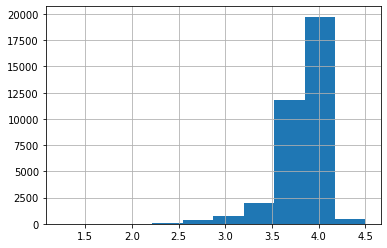

In [31]:
dfPredicted = pd.DataFrame({"Predict": test_predicted})
dfPredicted['Predict'].hist(bins=10)


In [32]:
mae = mean_absolute_error(dfValiTarget, test_predicted)

print("Average MAE: " + str(mae))
print("analyse_maes.append(" + str(mae) + ")")

Average MAE: 0.466425736378539
analyse_maes.append(0.466425736378539)


In [33]:

# print("Run: " + filePrefix)
# # Log of Results
# analyse_maes = []

# print("Average MAE over all tests: " + str(np.mean(analyse_maes)))

# Make sure it's predicting floats
# dfPredicted["Predict"].drop_duplicates()

Write to a subrun file

In [34]:
dfPredicted = pd.concat([dfValiIds.reset_index(), dfPredicted], axis=1).drop(columns="index")

if writeSubRunFile:
  dfPredicted.to_csv(subrunDir + filePrefix + "_subrun.csv", index=False)

print("Average MAE: " + str(mae))
print(dfPredicted.shape)
dfPredicted.sort_values("RowID").head(20)


Average MAE: 0.466425736378539
(35089, 4)


,RowID,BeerID,ReviewerID,Predict
0,22,12300,2634,3.903601
1,27,12300,5634,3.905488
2,28,12300,3544,3.916742
3,40,12300,6521,3.917982
4,43,12300,10177,3.922350
5,48,12300,2907,3.916427
6,49,12300,1532,3.915981
7,50,12300,3452,3.917165
8,59,12300,6861,3.906602
8503,64,6699,6401,3.871152


# Summary

No Param Tuning really needed here
* All Cols
* Average MAE: 0.466425736378539
